In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from ISLP import load_data
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut
import matplotlib.cm as cm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier

In [30]:
df = pd.read_csv('cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [31]:
df['Level_cat'] = np.array([0 if u == "Low" else 1 if u == "Medium" else 2 for u in df['Level']])
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Level_cat
0,0,P1,33,1,2,4,5,4,3,2,...,4,2,2,3,1,2,3,4,Low,0
1,1,P10,17,1,3,1,5,3,4,2,...,3,7,8,6,2,1,7,2,Medium,1
2,2,P100,35,1,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,2
3,3,P1000,37,1,7,7,7,7,6,7,...,2,3,1,4,5,6,7,5,High,2
4,4,P101,46,1,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,3,2,7,8,2,4,5,3,High,2
996,996,P996,37,2,6,8,7,7,7,6,...,6,5,7,2,4,3,1,4,High,2
997,997,P997,25,2,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,2
998,998,P998,18,2,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,2


In [32]:
df = df.drop(["Patient Id", "Level"], axis=1)

In [33]:
df

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level_cat
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,2
996,996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,2
997,997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
998,998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [34]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

In [50]:
sns.pairplot(data=df, vars=list(X.columns), hue = "Level_cat",markers = ['d', 'p', 'v'], kind="reg")

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000019855FC6AF0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000019855BDF3A0> (for post_execute):


KeyboardInterrupt: 

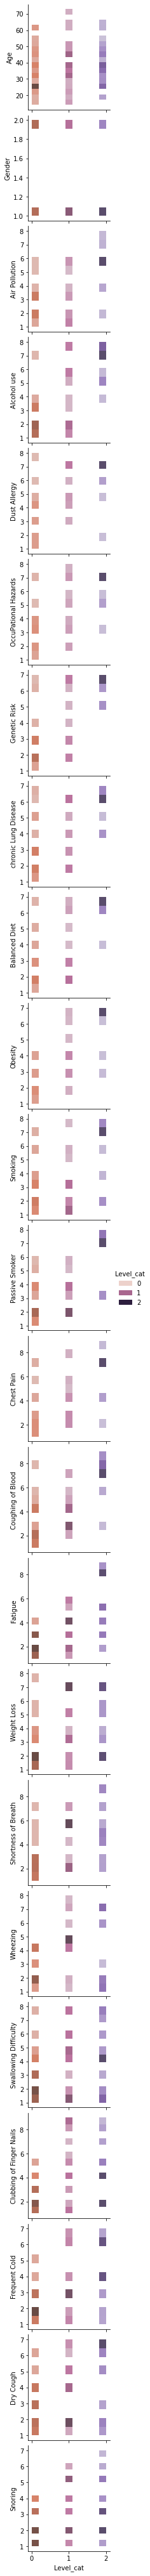

In [51]:
sns.pairplot(data=df, y_vars=list(X.columns), x_vars="Level_cat", hue = "Level_cat",markers = ['d', 'p', 'v'], kind="hist")

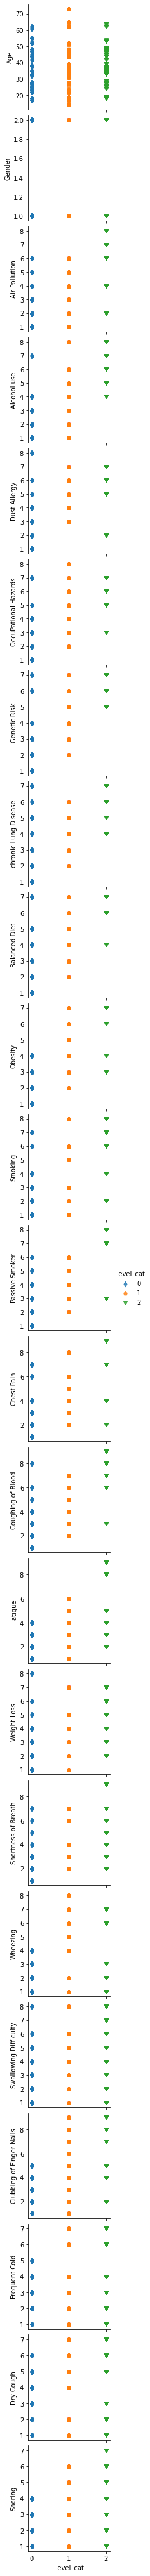

In [52]:
sns.pairplot(data=df, y_vars=list(X.columns), x_vars="Level_cat", hue = "Level_cat",markers = ['d', 'p', 'v'], kind="reg")

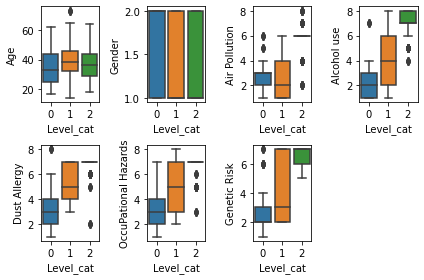

In [108]:
variables = list(X.columns)
vars = variables[0:8]
fig, axes = plt.subplots(2, 4)
flattened_axes = fig.axes
flattened_axes[-1].set_visible(False)
index = 0
for i in vars:
        ax = flattened_axes[index]
        sns.boxplot(y=i, x="Level_cat", data=df, ax=ax)
        index += 1
plt.tight_layout()
plt.show()

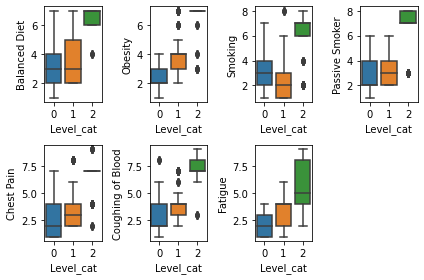

In [107]:
variables = list(X.columns)
vars = variables[8:16]
fig, axes = plt.subplots(2, 4)
flattened_axes = fig.axes
flattened_axes[-1].set_visible(False)
index = 0
for i in vars:
        ax = flattened_axes[index]
        sns.boxplot(y=i, x="Level_cat", data=df, ax=ax)
        index += 1
plt.tight_layout()
plt.show()

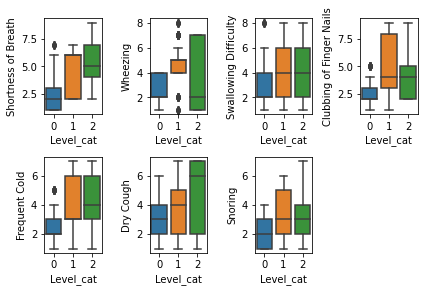

In [106]:
variables = list(X.columns)
vars = variables[16:]
fig, axes = plt.subplots(2, 4)
flattened_axes = fig.axes
flattened_axes[-1].set_visible(False)
index = 0
for i in vars:
        ax = flattened_axes[index]
        sns.boxplot(y=i, x="Level_cat", data=df, ax=ax)
        index += 1
plt.tight_layout()
plt.show()

# Start comparing

In [113]:
new_df=df[['Age','Coughing of Blood','Dust Allergy','Passive Smoker','OccuPational Hazards','Air Pollution','chronic Lung Disease','Shortness of Breath','Dry Cough','Snoring','Swallowing Difficulty','Level_cat']]
new_df.head()

,Age,Coughing of Blood,Dust Allergy,Passive Smoker,OccuPational Hazards,Air Pollution,chronic Lung Disease,Shortness of Breath,Dry Cough,Snoring,Swallowing Difficulty,Level_cat
0,33,4,5,2,4,2,2,2,3,4,3,0
1,17,3,5,4,3,3,2,7,7,2,6,1
2,35,8,6,3,5,4,4,9,7,2,1,2
3,37,8,7,7,7,7,7,3,7,5,4,2
4,46,9,7,7,7,6,6,4,2,3,4,2


In [116]:
X = new_df.drop('Level_cat', axis=1)
y = new_df['Level_cat']

## Current approach CV results

### K = 10

In [121]:
cvs_current = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=10)

In [122]:
print(cvs_current)

[0.91 0.92 0.89 0.92 0.93 0.92 0.91 0.94 0.92 0.93]


In [123]:
print(cvs_current.mean())

0.9189999999999999


### K = 5

In [125]:
cvs_current = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=5)

In [126]:
print(cvs_current)

[0.915 0.905 0.925 0.93  0.92 ]


In [127]:
print(cvs_current.mean())

0.9190000000000002


### K = 20

In [128]:
cvs_current = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=20)

In [129]:
print(cvs_current)

[0.84 0.98 0.86 0.96 0.82 0.98 0.9  0.94 0.94 0.92 0.94 0.9  0.96 0.86
 0.96 0.9  0.94 0.9  0.92 0.96]


In [130]:
print(cvs_current.mean())

0.9190000000000002


### K = 50

In [131]:
cvs_current = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=50)

In [132]:
print(cvs_current)

[0.7  0.9  1.   1.   0.9  0.85 0.85 1.   1.   0.9  0.85 0.75 0.9  1.
 1.   0.9  0.9  0.95 0.9  0.95 0.9  0.95 0.95 0.95 0.9  0.9  0.9  0.95
 0.95 0.9  0.9  1.   0.9  0.85 0.9  0.9  1.   1.   0.85 0.9  0.85 1.
 1.   0.95 0.75 0.85 1.   1.   0.95 0.95]


In [133]:
print(cvs_current.mean())

0.919


In [190]:
X = new_df.drop('Level_cat', axis=1)
y = new_df['Level_cat']
TR = []
BL = []
scores = []
for i in range(0, 50):
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.2, random_state=i)
    log = LogisticRegression(solver='liblinear')
    log.fit(X_new_train, y_new_train)

    y_pred = log.predict(X_new_test)

    cmx = confusion_matrix(y_new_test, y_pred)
    TR.append(cmx[0,2])
    scores.append(log.score(X_new_test, y_new_test))
    BL.append(cmx[2,0])

In [191]:
print(TR)
print(BL)
print(scores)

[0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.91, 0.905, 0.935, 0.93, 0.925, 0.895, 0.87, 0.925, 0.94, 0.92, 0.93, 0.945, 0.95, 0.9, 0.9, 0.94, 0.945, 0.93, 0.955, 0.94, 0.93, 0.905, 0.945, 0.94, 0.93, 0.92, 0.945, 0.915, 0.915, 0.895, 0.89, 0.895, 0.92, 0.92, 0.945, 0.9, 0.905, 0.915, 0.925, 0.94, 0.925, 0.935, 0.935, 0.9, 0.91, 0.925, 0.91, 0.935, 0.935, 0.895]


In [192]:
TR = np.asarray(TR)
BL = np.asarray(BL)
scores = np.asarray(scores)
print(TR.mean())
print(BL.mean())
print(scores.mean())

0.16
0.0
0.9218000000000002


## Constructing confusion matrices for a cv of 50

In [193]:
def conf_mat(model, X, y):
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=0)
    clf = model
    clf.fit(X_new_train, y_new_train)
    
    y_pred = clf.predict(X_new_test)

    cmx = confusion_matrix(y_new_test, y_pred)
    
    for i in range(1,50):
        X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=i)
        clf = model
        clf.fit(X_new_train, y_new_train)

        y_pred = clf.predict(X_new_test)
        
        cmx = cmx + confusion_matrix(y_new_test, y_pred)

    cmx = cmx/50
    return cmx

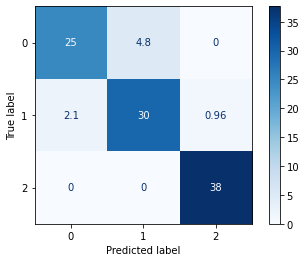

In [194]:
X = new_df.drop('Level_cat', axis=1)
y = new_df['Level_cat']
ConfusionMatrixDisplay(conf_mat(LogisticRegression(solver='liblinear'), X, y), display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)

In [195]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

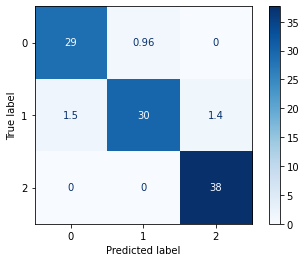

In [196]:
ConfusionMatrixDisplay(conf_mat(LogisticRegression(max_iter=10000 ,C=0.005, multi_class='multinomial', solver='saga'), X, y), display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)

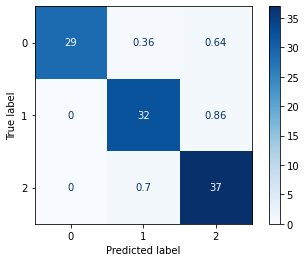

In [198]:
ConfusionMatrixDisplay(conf_mat(RandomForestClassifier(n_estimators=600, criterion='entropy', max_leaf_nodes=6, min_impurity_decrease=0.1, random_state=1), X, y), display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)